# REGRESSION PROJECT
### STUDENT PERFORMANCE DATASET 
The Student Performance Dataset is a dataset designed to examine the factors influencing academic student performance. The dataset consists of 10,000 student records, with each record containing information about various predictors and a performance index.The Analysis is to predict the Perfomance Index of the students by creating different models, below mentioned are the steps on which the models are created and how the accuracy is tested.

## 1. IMPORTING THE DATA

In [1]:
#Importing the data and Suppressing the Warnings. 
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
SPD = pd.read_csv(r"C:\Users\msour\OneDrive\Documents\IVY\Project python ML\Regression_Project_Student_Performance.csv")
SPD.head(5)

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


## 2. REMOVING DUPLICATES

In [2]:
#Removing any kind of duploicate present in the data. 
print(f"The original dataset contains {SPD.shape[0]} rows")
SPD.drop_duplicates()
print(f"After removing the duplicate records, it contains {SPD.shape[0]} rows. \nHence no duplicate columns")

The original dataset contains 10000 rows
After removing the duplicate records, it contains 10000 rows. 
Hence no duplicate columns


## 3. BASIC DATA ANALYSIS

In [3]:
#Basic Data Analysis
SPD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


There is no missing values in the data, hence we do not have to treat any missing values or remove columns based on that.

In [4]:
SPD.nunique()

Hours Studied                        9
Previous Scores                     60
Extracurricular Activities           2
Sleep Hours                          6
Sample Question Papers Practiced    10
Performance Index                   91
dtype: int64

<b>Categorical data</b> = ['Extracurricular Activities','Sample Question Papers Practiced']  
<b>Continuous data</b> = ['Hours Studied','Sleep Hours','Previous Scores','Performance Index']  
<b>Predictors</b> = ['Hours Studied', 'Previous Scores', 'Extracurricular Activities', 'Sleep Hours', 'Sample Question Papers Practiced']  
<b>Target</b> = 'Performance Index'

## 4. VISUAL EXPLORATORY DATA ANALYSIS  
### 4.1. UNIVARIATE ANALYSIS

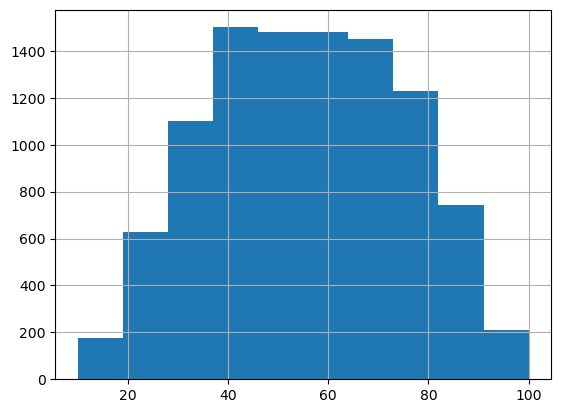

In [5]:
#checking the distribution for the target variable 
import matplotlib.pyplot as plt
SPD['Performance Index'].hist();

The Dataset contains a fair distribution for the values in the Target variable. Hence, it is good for Machine Learning. 

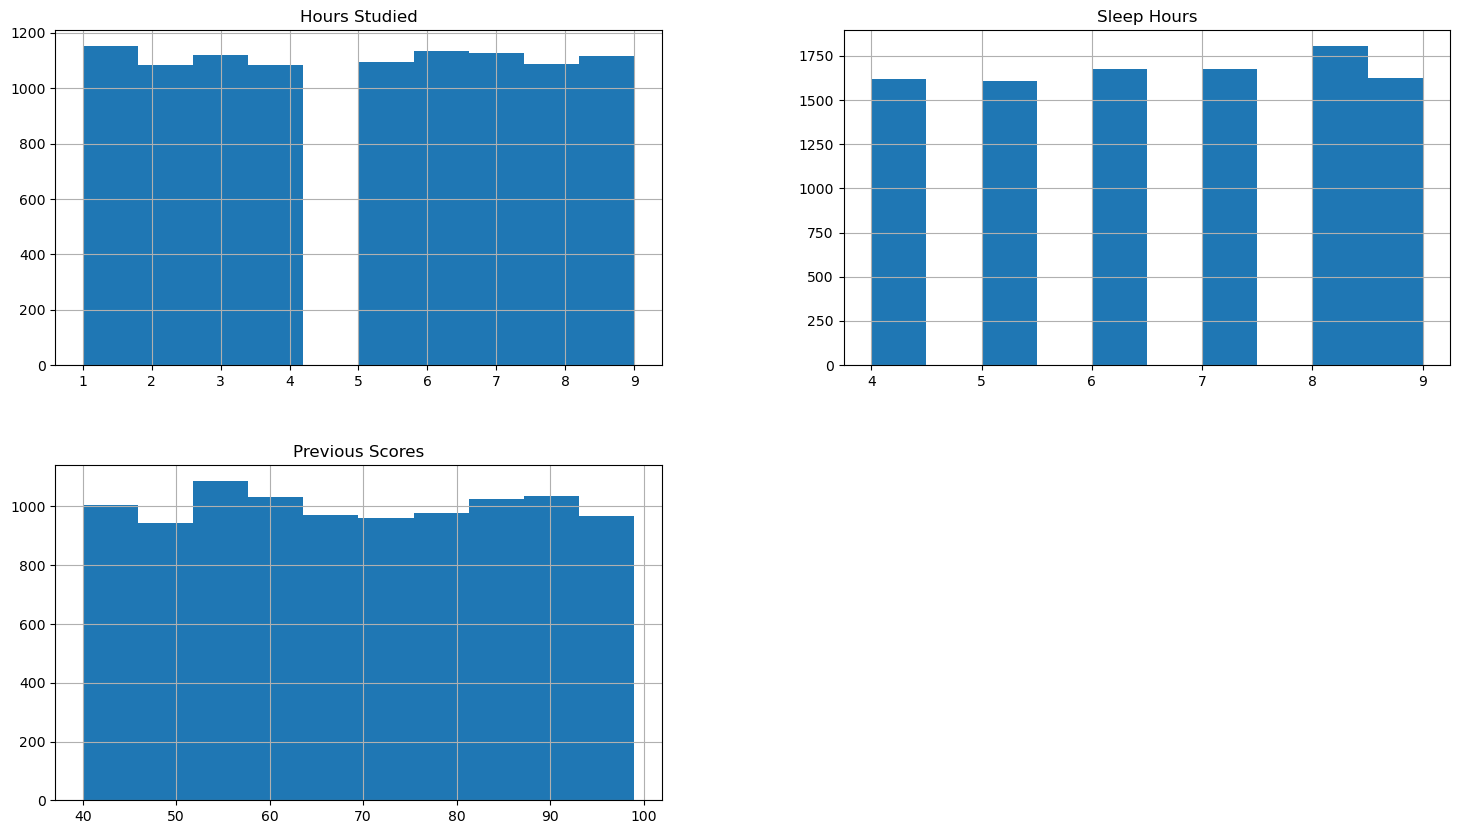

In [6]:
#checking the distribution for the Continuous Predictors
Contvar = ['Hours Studied','Sleep Hours','Previous Scores']
SPD[Contvar].hist(figsize=(18,10));

Based from the above graphs, it can be concluded that the value for each predictors are numerically distributed, reasonably balanced, with no severe skew or sparsity, hence no need to treat for any outliers.

In [7]:
#Checking the distribution for the Categorical variable. Defining a function to plot bar Chart
def plotbarcharts(inpdata,Catvar):
    import math
    import matplotlib.pyplot as plt
    fig, subplot = plt.subplots(ncols=3,nrows=math.ceil(len(Catvar)/3),figsize = (20,5))
    subplot.flatten()
    for i,cat in enumerate(Catvar):
        inpdata.groupby([cat]).size().plot(kind = 'bar',ax = subplot[i])
        subplot[i].set_title(cat)
    fig.suptitle("Distribution for Categorical Variables",fontsize=16, y=1.02, ha='center')

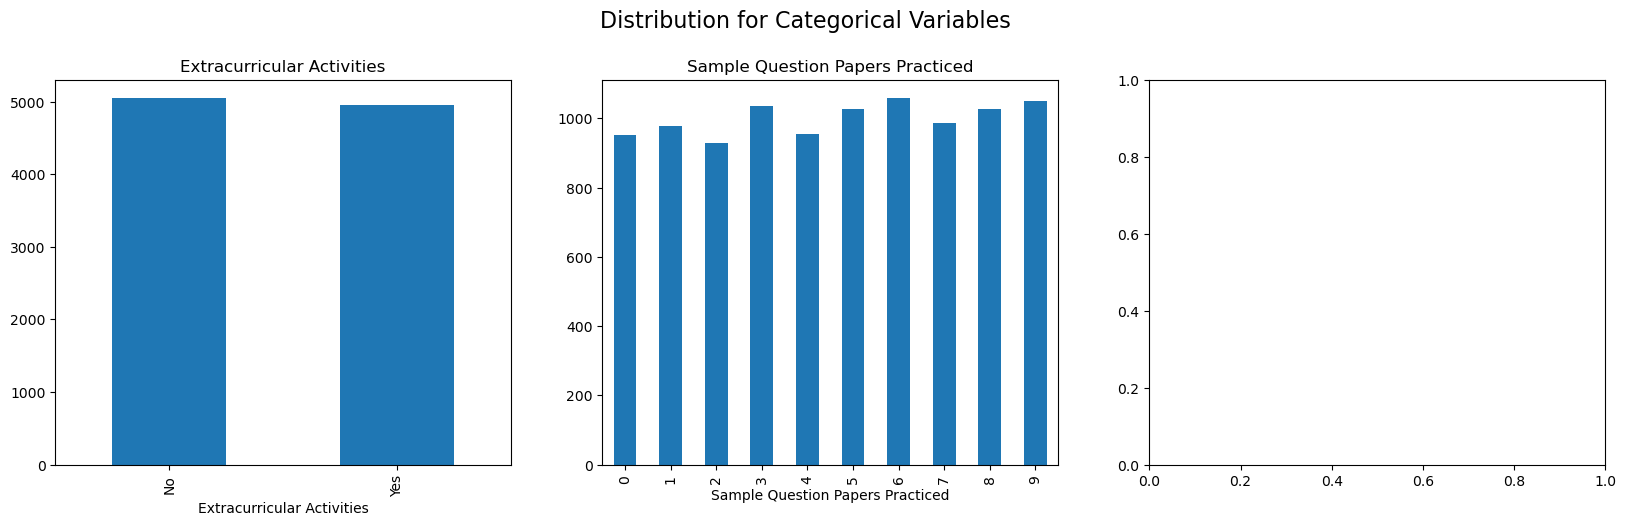

In [8]:
Catvar = ['Extracurricular Activities','Sample Question Papers Practiced']
plotbarcharts(SPD,Catvar)

The Dataset contains a fair number of records for each of the category in each of the predictors. Hence, no need to treat outliers.

### 4.2. BIVARIATE ANALYSIS

In [9]:
#Bivariate Analysis - Continuous vs Target. Defining a function to plot Continuous vs Target variable.
def contbivariate(inpdata,Contvar,Target):
    import matplotlib.pyplot as plt
    import math
    fig, subplot = plt.subplots(ncols=3,nrows=math.ceil(len(Contvar)/3),figsize = (20,5))
    fig.suptitle("Bivariate Analysis for Continuous Variable",fontsize=16)
    subplot.flatten()
    for i,cont in enumerate(Contvar):
        inpdata.plot.scatter(x=Target,y=cont,marker='o',ax=subplot[i])
        subplot[i].set_title(f"{cont} vs {Target}")

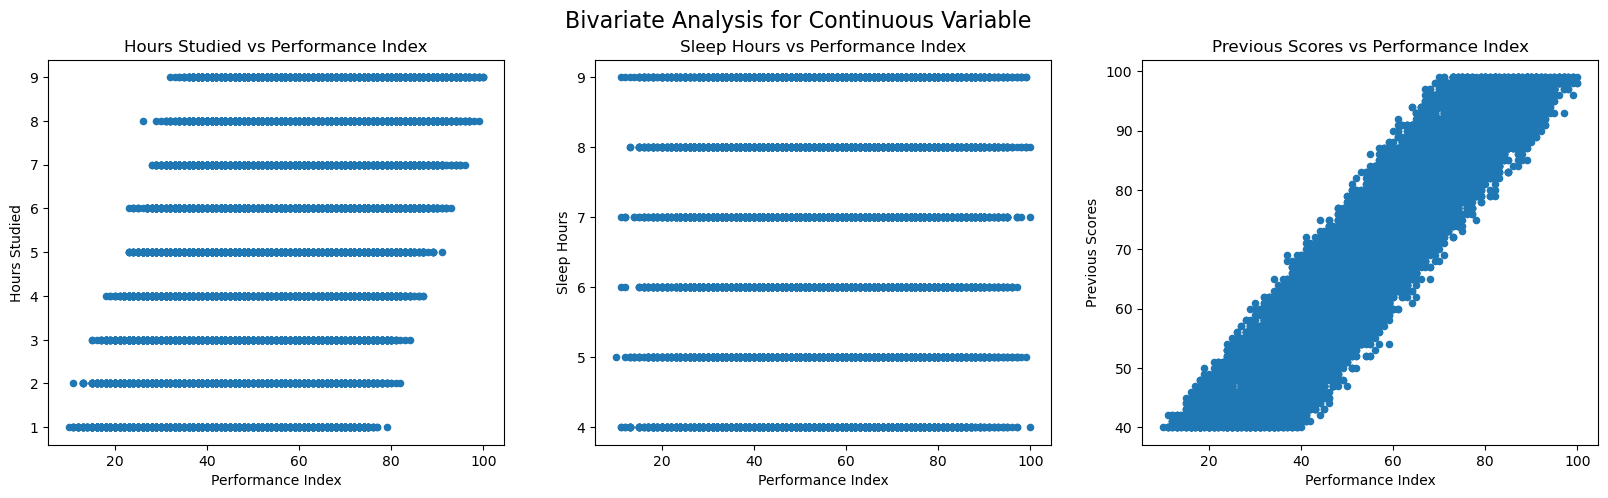

In [10]:
Contvar = ['Hours Studied','Sleep Hours','Previous Scores']
Target = 'Performance Index'
contbivariate(SPD,Contvar,Target)

In [11]:
#Bivariate Analysis - Categorical vs Target. Defining a function to plot Categorical vs Target variable.
def catbivariate(inpdata,Catvar,Target):
    import matplotlib.pyplot as plt
    import math
    fig, subplot = plt.subplots(ncols=3,nrows=math.ceil(len(Catvar)/3),figsize = (20,5))
    fig.suptitle("Bivariate Analysis for Categorical Variable",fontsize=16)
    subplot.flatten()
    for i,cat in enumerate(Catvar):
        inpdata.groupby([cat])[Target].count().plot(kind='bar',ax=subplot[i])
        subplot[i].set_title(f"{cat} vs {Target}")

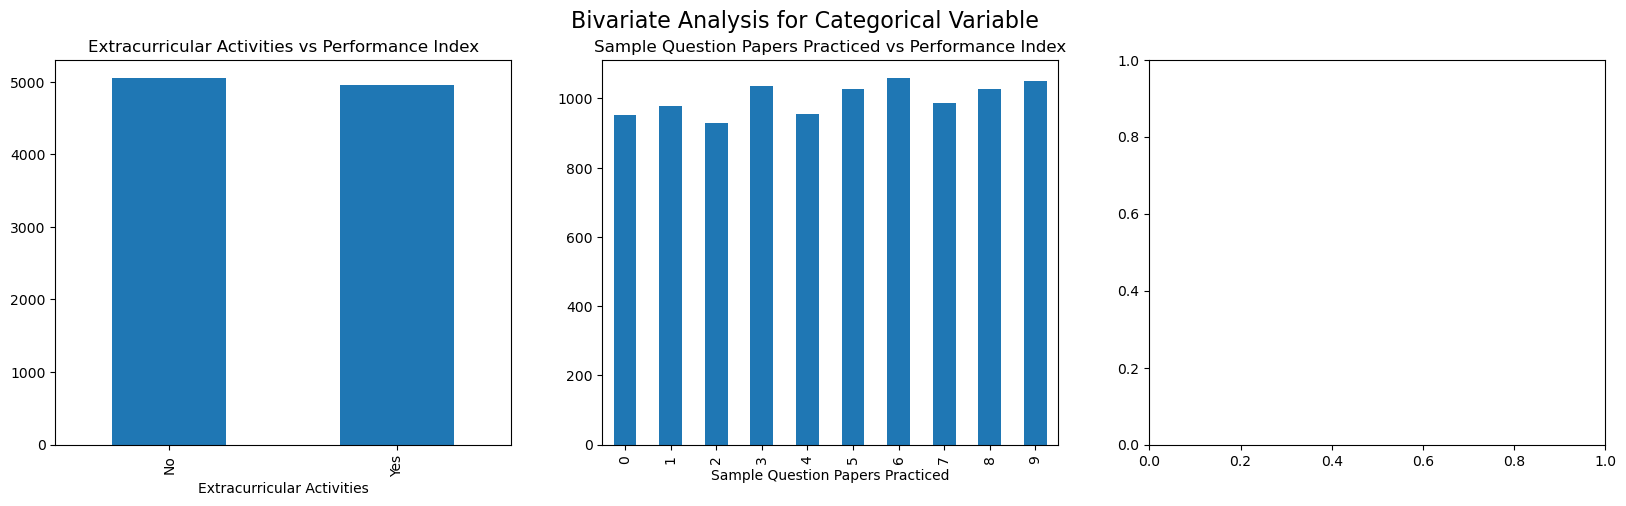

In [12]:
Catvar = ['Extracurricular Activities','Sample Question Papers Practiced']
Target = 'Performance Index'
catbivariate(SPD,Catvar,Target)

In [13]:
#Bivariate Analysis - Categorical vs Target (Box plot)
def bivariateboxplot(inpdata,Catvar,Target):
    import matplotlib.pyplot as plt
    import math
    fig, subplot = plt.subplots(ncols=3,nrows=math.ceil(len(Catvar)/3),figsize = (20,5))
    subplot = subplot.flatten()
    for i,cat in enumerate(Catvar):
        inpdata.boxplot(column=Target,by=cat,ax=subplot[i])
        subplot[i].set_title(f"{cat} vs {Target}")
    plt.suptitle("")

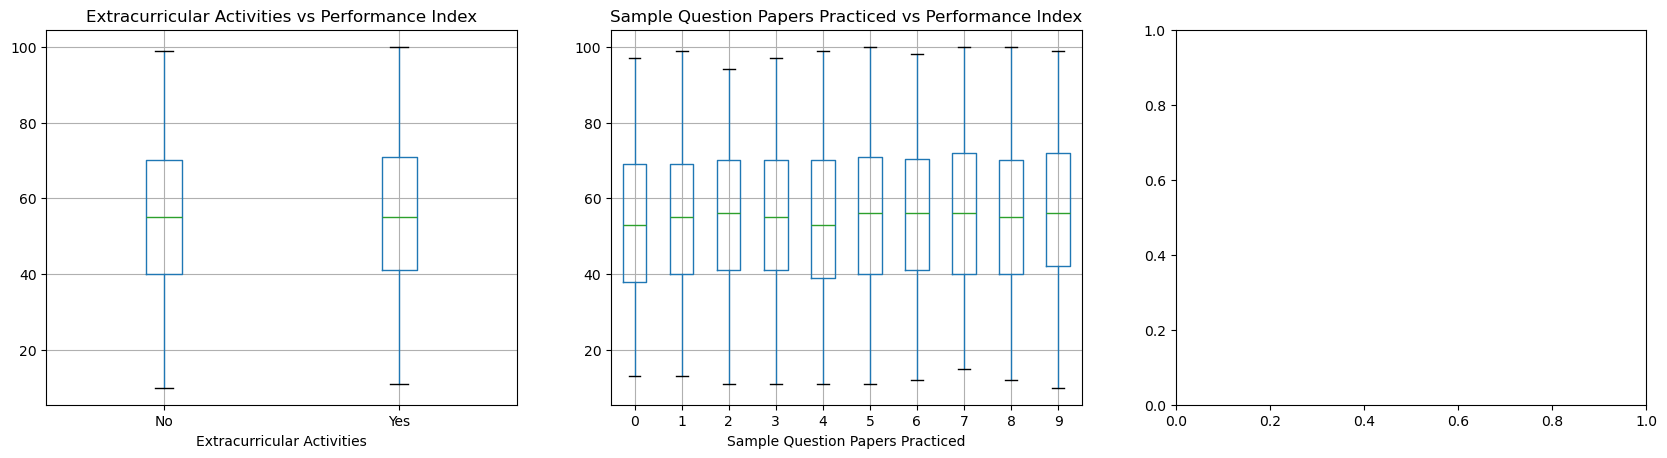

In [14]:
Catvar = ['Extracurricular Activities','Sample Question Papers Practiced']
Target = 'Performance Index'
bivariateboxplot(SPD,Catvar,Target)

### 4.2. BIVARIATE ANALYSIS - CORRELATION MATRIX

In [15]:
#To deterimine the best continous predictor correlated with the Target variable, we use correlation matrix. 
Continuous_data = ['Hours Studied','Sleep Hours','Previous Scores','Performance Index']
SPD[Continuous_data].corr()

,Hours Studied,Sleep Hours,Previous Scores,Performance Index
Hours Studied,1.000000,0.001245,-0.012390,0.373730
Sleep Hours,0.001245,1.000000,0.005944,0.048106
Previous Scores,-0.012390,0.005944,1.000000,0.915189
Performance Index,0.373730,0.048106,0.915189,1.000000


Filtering only those columns where absolute correlation > 0.3 with Target Variable.  
Therefore the selected continuous predictor = ['Hours Studied','Previous Scores']

### 4.2. BIVARIATE ANALYSIS - ANOVA TEST

In [16]:
#To deterimine the best categorical predictor correlated with the Target variable, we use Anova test.
#Testing ANOVA results for the Categorical data.
def AnovaTest(inpdata,Catvar,Target):
    from scipy.stats import f_oneway
    Selected_Predictors =[]
    for cat in Catvar:
        #Grouping the Target Variable on the basis of the category of each field.
        Groupeddata = inpdata.groupby(cat)[Target].apply(list)
        Anova_result = f_oneway(*Groupeddata)
        #If the p-value is less than 0.05, that means the null hypothesis is rejected and the predictor is correlated
        if Anova_result[1]<0.05:
            print(f"{cat} is correlated with {Target} and the p-value is {Anova_result[1]}")
            Selected_Predictors.append(cat)
        else:
            print(f"{cat} is not correlated with {Target} and the p-value is {Anova_result[1]}")      
    return Selected_Predictors

In [17]:
Catvar = ['Extracurricular Activities','Sample Question Papers Practiced']
Target = 'Performance Index'
print("\nThe selected Categorical Predictors :",AnovaTest(SPD,Catvar,Target))

Extracurricular Activities is correlated with Performance Index and the p-value is 0.014184491568582584
Sample Question Papers Practiced is correlated with Performance Index and the p-value is 0.000710816871057489

The selected Categorical Predictors : ['Extracurricular Activities', 'Sample Question Papers Practiced']


Therefore the selected Predictors are: ['Hours Studied','Previous Scores','Extracurricular Activities', 'Sample Question Papers Practiced']

## 5. DATA PROCESSING FOR MACHINE LEARNING
The dataset is transformed to all numeric before fitting to any of the Regression model. In this case the Predictor variable that is 'Extracurricular Activities' is converted from ordinal categorical to numeric.

In [18]:
#Taking all the varibales from the original Dataframe and storing it into a different Dataframe for Machine Learning
Selected_columns = ['Hours Studied','Previous Scores','Extracurricular Activities', 'Sample Question Papers Practiced','Performance Index']
DML = SPD[Selected_columns]
DML.head(5)

,Hours Studied,Previous Scores,Extracurricular Activities,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,1,91.0
1,4,82,No,2,65.0
2,8,51,Yes,2,45.0
3,5,52,Yes,2,36.0
4,7,75,No,5,66.0


In [19]:
#Defing a function that converts ordinal categorical data into numeric
def categoricaltonumeric(inpdata,catvar):
    import pandas as pd
    unique_category_list=[]
    for i in catvar:
        uniques = inpdata[i].unique().tolist()
        unique_category_list.append(uniques)
    for i,col_order in zip(catvar,unique_category_list):
        inpdata[i] = pd.Categorical(inpdata[i],categories = col_order,ordered = True)
        inpdata[i] = inpdata[i].cat.codes
    return inpdata

In [20]:
ordinal_cat = ['Extracurricular Activities']
DML_Numeric = DML.copy()
DML_Numeric = categoricaltonumeric(inpdata = DML_Numeric,catvar = ordinal_cat)
DML_Numeric.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sample Question Papers Practiced,Performance Index
0,7,99,0,1,91.0
1,4,82,1,2,65.0
2,8,51,0,2,45.0
3,5,52,0,2,36.0
4,7,75,1,5,66.0


In [21]:
#Assigning all the Predictor values as X and the Target values as Y
Predictors = ['Hours Studied','Previous Scores','Extracurricular Activities', 'Sample Question Papers Practiced']
Target = 'Performance Index'
X = DML_Numeric[Predictors].values
Y = DML_Numeric[Target].values
print(X.shape,Y.shape[0])

(10000, 4) 10000


In [22]:
#Splitting the data into Training and Testing
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.30,random_state = 30)
print(X_train.shape,X_test.shape,Y_train.shape[0],Y_test.shape[0])

(7000, 4) (3000, 4) 7000 3000


In [23]:
#Suppressng Scientific Notation
import numpy as np
np.set_printoptions(suppress = True)

Creating a function for Regression for 2 models and those are <b>Multiple Linear Regression</b> and <b>Decision Tree</b>

## 6. MULTIPLE LINEAR REGRESSION

In [24]:
def Multiple_Linear_Regression(X,Y,cross_fold=10):
    import pandas as pd
    import numpy as np
    #Splitting the data into Training and Testing
    from sklearn.model_selection import train_test_split
    X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.30,random_state = 30)
    
    from sklearn.linear_model import LinearRegression
    Regmodel = LinearRegression()
    LREG = Regmodel.fit(X_train,Y_train)
    print("---------Model: Linear_Regression---------")
    #Checking th goodness of fit of the training data
    from sklearn import metrics
    print("\nThe goodness of fit of the model or the R2 value: ",round(metrics.r2_score(Y_train,LREG.predict(X_train)),4))
    
    prediction = LREG.predict(X_test)
    TestingResult = pd.DataFrame(data = prediction, columns = ['Predicted_value'])
    TestingResult['Orignal_value'] = Y_test
    TestingResult['APE'] = (abs(TestingResult['Predicted_value']-TestingResult['Orignal_value'])/TestingResult['Orignal_value'])
    print("\nPrinting few of the predicted and the original target valaible of the Dataset: \n",round(TestingResult.head(5),4))

    Accuracy_Mean = 1-(np.mean(TestingResult['APE']))
    Accuracy_Median = 1-(np.median(TestingResult['APE']))
    print("\nMean Accuracy of the model in Testing Sampling Data is: ",round(Accuracy_Mean,4))
    print("Median Accuracy of the model in Testing Sampling Data is: ",round(Accuracy_Median,4))
    
    #defining a function for the model to calculate the accuracy_score on the basis of accuracy level.
    def Accuracy_score(orig,pred):
        MAPE = np.mean(abs(orig-pred)/orig)
        return (1-MAPE)

    #Making a custome scorer based on the above function
    from sklearn.metrics import make_scorer
    custom_scoring=make_scorer(Accuracy_score,greater_is_better=True)

    #Now calculating the accuracy of the model, by custom scoring
    from sklearn.model_selection import cross_val_score
    import numpy as np
    Accuracy_values = cross_val_score(LREG,X,Y,cv=cross_fold,scoring = custom_scoring)
    print(f"\nThe Accuracy Values for the {cross_fold}-fold cross validation are: \n",Accuracy_values)
    print("\nMean of the Accuracy: ",round(np.mean(Accuracy_values),4))
    print("Median of the Accuracy: ",round(np.median(Accuracy_values),4))

In [25]:
Multiple_Linear_Regression(X,Y,cross_fold=10)

---------Model: Linear_Regression---------

The goodness of fit of the model or the R2 value:  0.9869

Printing few of the predicted and the original target valaible of the Dataset: 
    Predicted_value  Orignal_value     APE
0          57.8381           55.0  0.0516
1          48.5082           47.0  0.0321
2          59.3616           59.0  0.0061
3          40.6038           42.0  0.0332
4          61.0750           62.0  0.0149

Mean Accuracy of the model in Testing Sampling Data is:  0.9638
Median Accuracy of the model in Testing Sampling Data is:  0.9735

The Accuracy Values for the 10-fold cross validation are: 
 [0.96420082 0.96122741 0.96387814 0.96216492 0.96304068 0.96270814
 0.96245243 0.96313437 0.9609135  0.96440063]

Mean of the Accuracy:  0.9628
Median of the Accuracy:  0.9629


## 7. DECISION TREE

In [26]:
def Decision_Tree_Regression(X,Y,depth,cross_fold):
    import pandas as pd
    import numpy as np
    #Splitting the data into Training and Testing
    from sklearn.model_selection import train_test_split
    X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.30,random_state = 30)
    
    from sklearn.tree import DecisionTreeRegressor
    Regmodel = DecisionTreeRegressor(max_depth = depth,criterion = 'squared_error')
    DT = Regmodel.fit(X_train,Y_train)
    print("---------Model: Decision Tree---------")
    #Checking th goodness of fit of the training data
    from sklearn import metrics
    print("\nThe goodness of fit of the model or the R2 value: ",round(metrics.r2_score(Y_train,DT.predict(X_train)),4))
    
    prediction = DT.predict(X_test)
    TestingResult = pd.DataFrame(data = prediction, columns = ['Predicted_value'])
    TestingResult['Orignal_value'] = Y_test
    TestingResult['APE'] = (abs(TestingResult['Predicted_value']-TestingResult['Orignal_value'])/TestingResult['Orignal_value'])
    print("\nPrinting few of the predicted and the original target valaible of the Dataset: \n",round(TestingResult.head(5),4))

    Accuracy_Mean = 1-(np.mean(TestingResult['APE']))
    Accuracy_Median = 1-(np.median(TestingResult['APE']))
    print("\nMean Accuracy of the model in Testing Sampling Data is: ",round(Accuracy_Mean,4))
    print("Median Accuracy of the model in Testing Sampling Data is: ",round(Accuracy_Median,4))
    
    #defining a function for the model to calculate the accuracy_score on the basis of accuracy level.
    def Accuracy_score(orig,pred):
        MAPE = np.mean(abs(orig-pred)/orig)
        return (1-MAPE)

    #Making a custome scorer based on the above function
    from sklearn.metrics import make_scorer
    custom_scoring=make_scorer(Accuracy_score,greater_is_better=True)

    #Now calculating the accuracy of the model, by custom scoring
    from sklearn.model_selection import cross_val_score
    import numpy as np
    Accuracy_values = cross_val_score(DT,X,Y,cv=cross_fold,scoring = custom_scoring)
    print(f"\nThe Accuracy Values for the {cross_fold}-fold cross validation are: \n",Accuracy_values)
    print("\nMean of the Accuracy: ",round(np.mean(Accuracy_values),4))
    print("Median of the Accuracy: ",round(np.median(Accuracy_values),4))

In [27]:
Decision_Tree_Regression(X,Y,depth=3,cross_fold=10)

---------Model: Decision Tree---------

The goodness of fit of the model or the R2 value:  0.8964

Printing few of the predicted and the original target valaible of the Dataset: 
    Predicted_value  Orignal_value     APE
0          56.2155           55.0  0.0221
1          37.7053           47.0  0.1978
2          52.6332           59.0  0.1079
3          52.6332           42.0  0.2532
4          52.6332           62.0  0.1511

Mean Accuracy of the model in Testing Sampling Data is:  0.8937
Median Accuracy of the model in Testing Sampling Data is:  0.9205

The Accuracy Values for the 10-fold cross validation are: 
 [0.88878577 0.88858659 0.89569133 0.88891234 0.89214892 0.88804381
 0.8863593  0.89248481 0.88754286 0.89573892]

Mean of the Accuracy:  0.8904
Median of the Accuracy:  0.8888


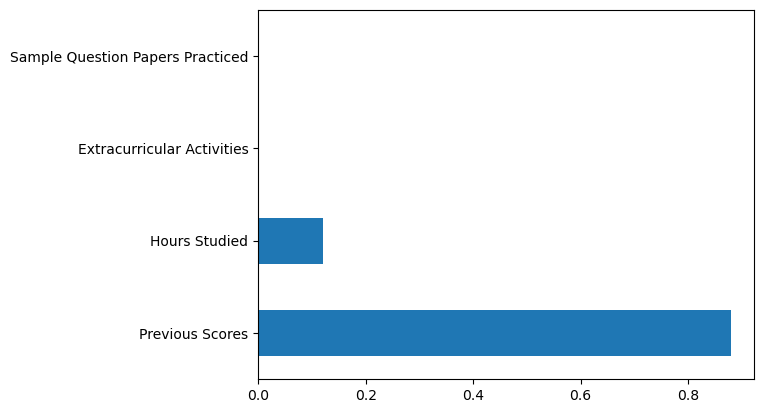

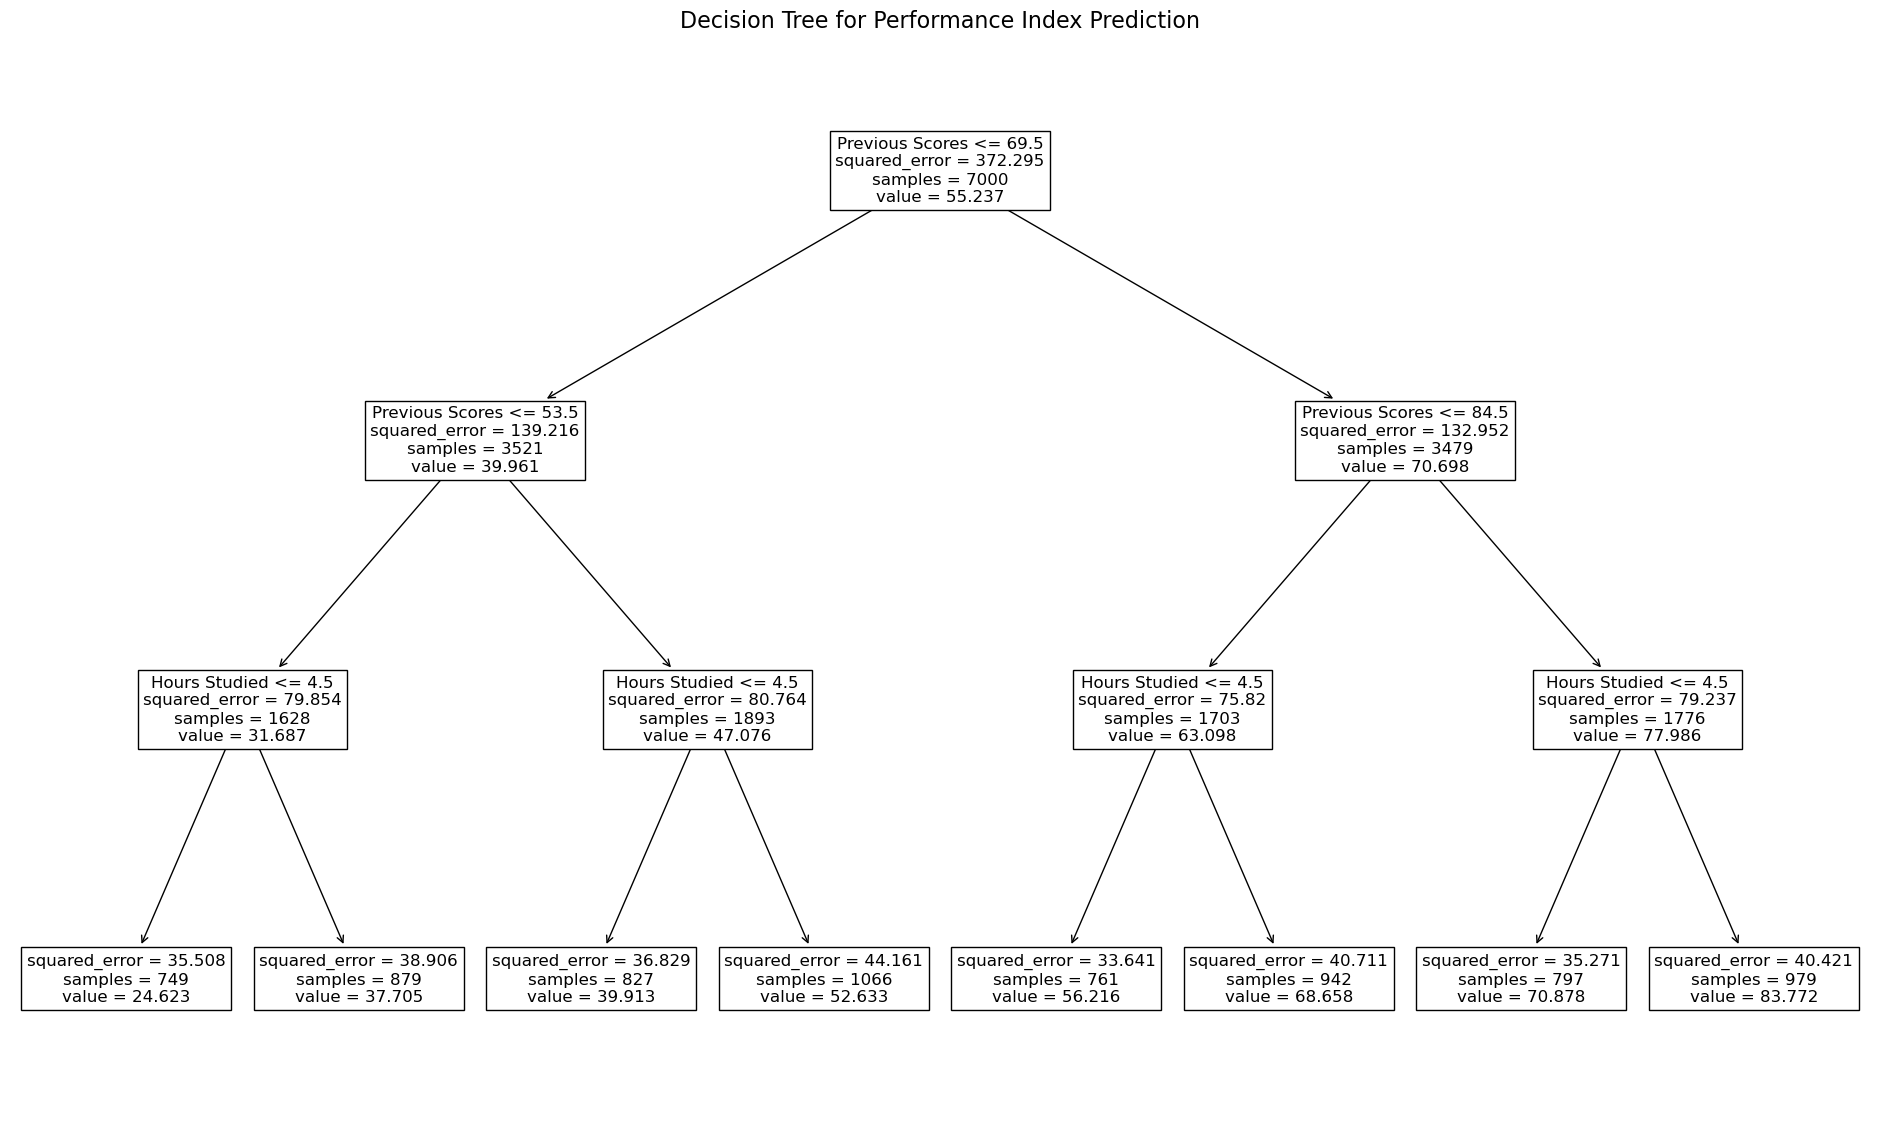

In [28]:
Predictors = ['Hours Studied','Previous Scores','Extracurricular Activities', 'Sample Question Papers Practiced']
Target = 'Performance Index'
#plotting decision tree and the feature importance
from sklearn.tree import DecisionTreeRegressor
Regmodel = DecisionTreeRegressor(max_depth = 3,criterion = 'squared_error')
DT = Regmodel.fit(X_train,Y_train)

feature_importances = pd.Series(DT.feature_importances_, index = Predictors)
feature_importances.nlargest(10).plot(kind='barh')

import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import plot_tree
plt.figure(figsize=(24, 14))
plot_tree(DT,max_depth=3,feature_names=Predictors,
          class_names=SPD[Target].unique().astype(str).tolist(),
          label='all',precision=3,fontsize=12)

plt.title("Decision Tree for Performance Index Prediction",fontsize=16)
plt.show()